<a href="https://colab.research.google.com/github/AsraniSanjana/All_Codes/blob/main/All_Semester_Codes/ML_sem7/models/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sanjana Asrani_D17B_01_ML_EXP03

PIMA DAIBETES DATASET.

BATCH A


---



IMPORT THE LIBRARIES

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

PRINT A FEW TUPLES OF THE DATASET

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)
pima = pima.iloc[1: , :]

In [ ]:
pima.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31,0.248,26,1
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1
10,8,125,96,0,0,0,0.232,54,1




---


CREATING A CLASSIFIER OBJECT

In [ ]:
#split dataset in features and target variable

feature_cols= ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
# we want all columns as features except for the last one which is class.

X = pima[feature_cols] # Features
y = pima.label # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_pred shape:", y_pred.shape)
print("y_test shape:", y_test.shape)

X_train shape: (537, 8)
X_test shape: (231, 8)
y_pred shape: (231,)
y_test shape: (231,)


DECIDING WHETHER ALL OF THE ATTRIBUTES ARE IMPORTANT ENOUGH TO BE CONSIDERED FOR MODEL BUILDING


In [ ]:

# Get the feature importances and their indices
feature_importances = clf.feature_importances_

# Sort features by importance
sorted_features = sorted(zip(feature_cols, feature_importances), key=lambda x: x[1], reverse=True)

# Create a list of rows for the table
table_data = [[feature_cols, f'{importance:.4f}'] for feature_cols, importance in sorted_features]

# Add a header to the table
table_header = ['Feature', 'Importance']

# Print the table
print(tabulate(table_data, headers=table_header, tablefmt="grid"))


+-----------+--------------+
| Feature   |   Importance |
+===========+==============+
| glucose   |       0.2579 |
+-----------+--------------+
| bmi       |       0.2038 |
+-----------+--------------+
| bp        |       0.1694 |
+-----------+--------------+
| age       |       0.1125 |
+-----------+--------------+
| pedigree  |       0.1003 |
+-----------+--------------+
| pregnant  |       0.0637 |
+-----------+--------------+
| skin      |       0.0613 |
+-----------+--------------+
| insulin   |       0.031  |
+-----------+--------------+




---


CALCULATION OF EVALUATION MEASURES FOR THE MODEL:
1. ACCURACY OF THE MODEL

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


2. CONFUSION MATRIX:

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[120  26]
 [ 31  54]]


3. PRECISION

In [ ]:
from sklearn.metrics import precision_score

# Assuming you have y_true (actual labels) and y_pred (predicted labels)
precision_yes = precision_score(y_test, y_pred, pos_label='1')
precision_no = precision_score(y_test, y_pred, pos_label='0')

# Print the precision score
print("Precision for diabetes true:", precision_yes)
print("Precision for diabetes false:", precision_no)


Precision for diabetes true: 0.675
Precision for diabetes false: 0.7947019867549668


4. F1 SCORE

In [ ]:
from sklearn.metrics import f1_score
f1_yes = f1_score(y_test, y_pred, pos_label='1')
f1_no = f1_score(y_test, y_pred, pos_label='0')
print("F1-Score for diabetes true:", f1_yes)
print("F1-Score for diabetes false:", f1_no)

F1-Score for diabetes true: 0.6545454545454545
F1-Score for diabetes false: 0.8080808080808082


5. ROC

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


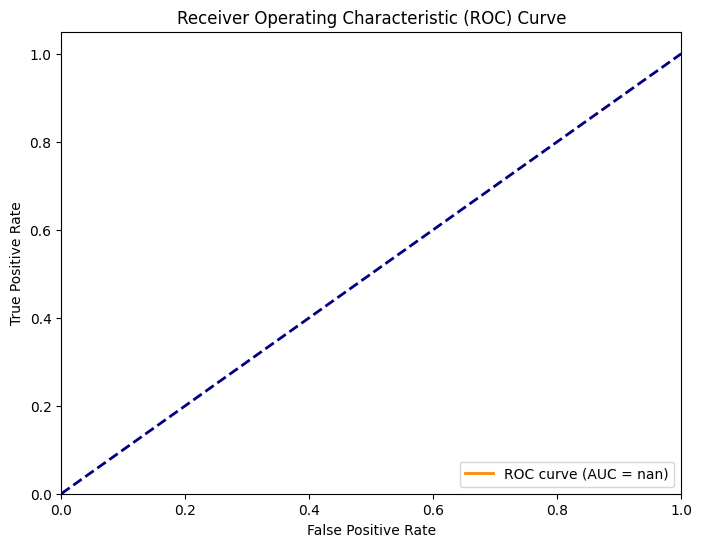

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have X_train, X_test, y_train, y_test as defined in your code

# Train Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_score = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


AND FINALLY, THE CLASSIFICATION REPORT

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['Class 0 (Negative)', 'Class 1 (Positive)'])

# Print the classification report
print("Classification Report:\n", report)


Classification Report:
                     precision    recall  f1-score   support

Class 0 (Negative)       0.74      0.79      0.77       146
Class 1 (Positive)       0.59      0.52      0.55        85

          accuracy                           0.69       231
         macro avg       0.67      0.66      0.66       231
      weighted avg       0.69      0.69      0.69       231



---
NOTE : PRUNED TREE - MAX_DEPTH SPECIFIED.

In [ ]:
# Create a DecisionTreeClassifier object with pruning (limiting maximum depth)
pruned_clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, splitter="best")

# Train the pruned classifier on the training data
pruned_clf = pruned_clf.fit(X_train, y_train)

# Train the original classifier on the training data
original_clf = DecisionTreeClassifier(criterion="entropy", splitter="best")

# Train the original classifier on the training data
original_clf = original_clf.fit(X_train, y_train)

# Predict the response for the test dataset using the original tree
y_pred_original = original_clf.predict(X_test)

# Calculate the accuracy of the original tree
accuracy_original = accuracy_score(y_test, y_pred_original)
# print("Accuracy (Original Tree):", accuracy_original * 100)

# Predict the response for the test dataset using the pruned tree
y_pred_pruned = pruned_clf.predict(X_test)

# Calculate the accuracy of the pruned tree
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
# print("Accuracy (Pruned Tree):", accuracy_pruned * 100)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (537, 8)
X_test shape: (231, 8)


---
CONCLUSIONS ON COMPARISON


1.   criterion="entropy" vs "gain" &
2.   splitter="best" vs "random"  &
3.   depth= 3 & 5

In [ ]:
from tabulate import tabulate

criteria = ["entropy", "gini"]
splitters = ["best", "random"]
max_depths = [3, 5]

results = []

for criterion in criteria:
    for splitter in splitters:
        for max_depth in max_depths:
            # Unpruned tree
            clf = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # Pruned tree
            pruned_clf = DecisionTreeClassifier(criterion=criterion, max_depth=5, splitter="best")
            pruned_clf.fit(X_train, y_train)
            y_pred_pruned = pruned_clf.predict(X_test)
            accuracy_pruned = accuracy_score(y_test, y_pred_pruned)

            results.append([criterion, splitter, max_depth, accuracy, accuracy_pruned])

# Display the results in a table
headers = ["Criterion", "Splitter", "Max Depth", "Unpruned Accuracy", "Pruned Accuracy"]
print(tabulate(results, headers=headers, floatfmt=(".0f", ".0f", ".0f", ".4f", ".4f")))


Criterion    Splitter      Max Depth    Unpruned Accuracy    Pruned Accuracy
-----------  ----------  -----------  -------------------  -----------------
entropy      best                  3               0.7706             0.7662
entropy      best                  5               0.7706             0.7706
entropy      random                3               0.7359             0.7792
entropy      random                5               0.7316             0.7835
gini         best                  3               0.7576             0.7706
gini         best                  5               0.7619             0.7792
gini         random                3               0.7229             0.7576
gini         random                5               0.7532             0.7619


---
ORIGINAL VS PRUNED TREE

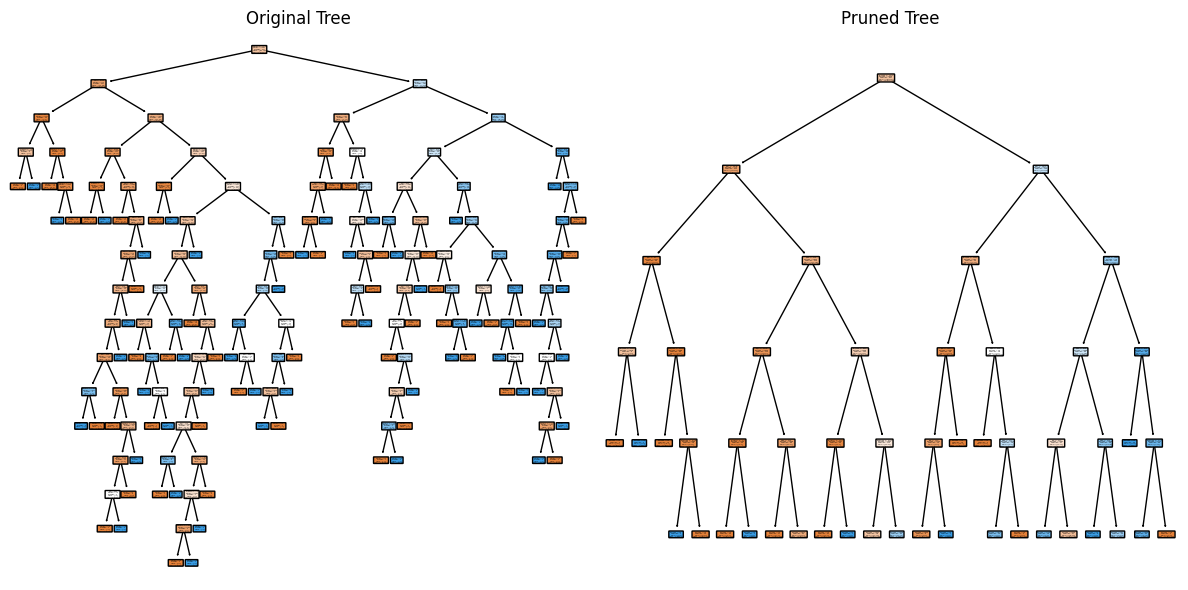

Depth of the Original Tree: 15 								Depth of the Pruned Tree: 5


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the original decision tree
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_tree(original_clf, feature_names=feature_cols, class_names=["No Diabetes", "Diabetes"], filled=True, rounded=True)
plt.title("Original Tree")

# Plot the pruned decision tree just to the right of our original tree
plt.subplot(1, 2, 2)
plot_tree(pruned_clf, feature_names=feature_cols, class_names=["No Diabetes", "Diabetes"], filled=True, rounded=True)
plt.title("Pruned Tree")

plt.tight_layout()
plt.show()

# Print the depths of the trees
original_tree_depth = original_clf.tree_.max_depth
pruned_tree_depth = pruned_clf.tree_.max_depth

print("Depth of the Original Tree:", original_tree_depth,"\t\t\t\t\t\t\t\t\tDepth of the Pruned Tree:", pruned_tree_depth)

---
Decision tree using id3 with a depth.

Accuracy: 0.76
Depth of the Decision Tree: 3


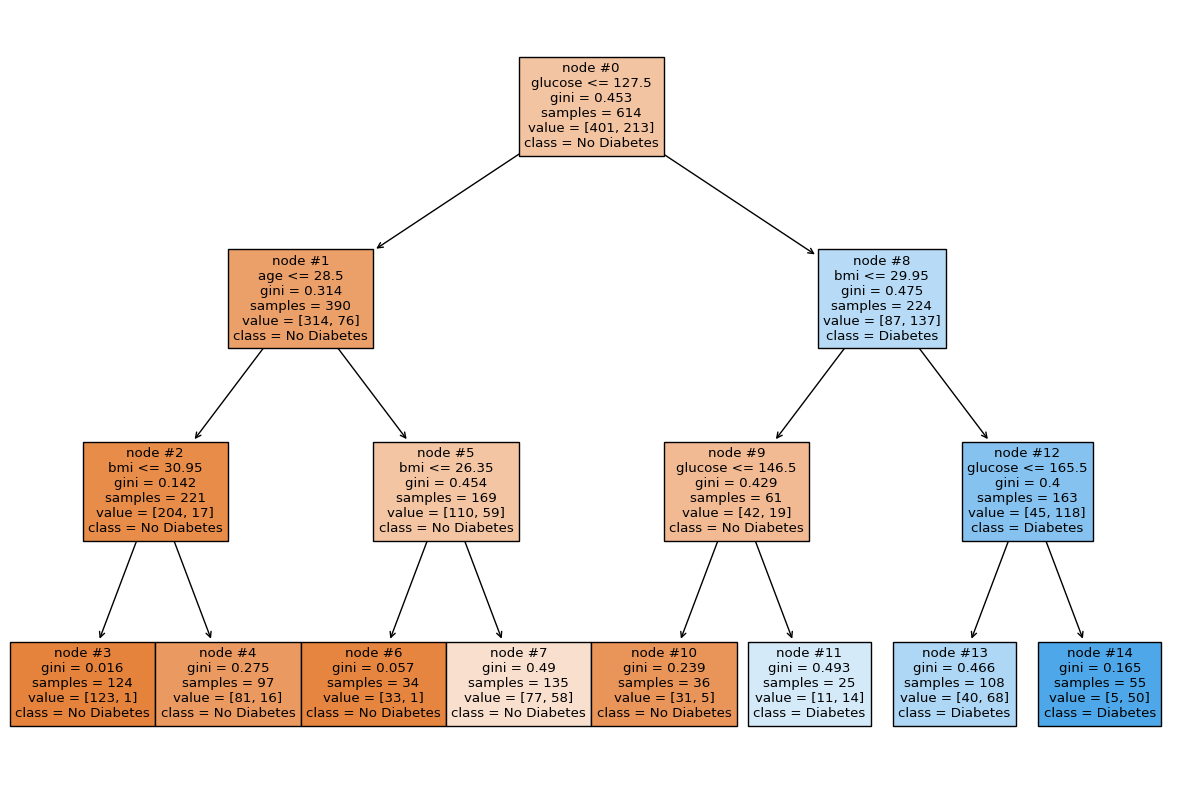

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Pima Indians Diabetes Dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ["pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin", "bmi", "diabetes_pedigree", "age", "outcome"]
data = pd.read_csv(url, names=column_names)

# Separate features and target
X = data.drop("outcome", axis=1)
y = data["outcome"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier with pruning (max_depth parameter)
clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Adjust max_depth as needed

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get the feature names (attributes)
feature_names = column_names[:-1]

# Get the depth of the decision tree
tree_depth = clf.get_depth()
print(f"Depth of the Decision Tree: {tree_depth}")

# Customize node labels to display attributes
class_names = ["No Diabetes", "Diabetes"]
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names, node_ids=True)
plt.show()


---
QUERY.... WHAT IF
number of pregnancies =0, glucose=59, blood_pressure=65, skin_thickness=20, insulin=100, bmi=25.3, diabetes_pedigree=0.42, age=30,
outcome = ? using pruned tree
outcome = ? using original tree

In [ ]:
# random_input = np.array([[3,	78	,50,	32,	88,	31,	0.248,	26]])   # training data row no. 7 : .... class 1
random_input = np.array([[1	,85,	66,	29	,0	,26.6,	0.351	,31]])    # training  data row no. : 2 .. class 0


# Get the predicted class label
predicted_class = original_clf.predict(random_input)

print("\nusing un-pruned classifier:\n")
if(predicted_class=='0'): print("absence of diabetes.\n")
else: print("presence of diabetes.\n")

predicted_class_pruned = pruned_clf.predict(random_input)

print("\nusing pruned classifier:\n")
if(predicted_class_pruned=='0'): print("absence of diabetes.\n")
else: print("presence of diabetes.\n")




using un-pruned classifier:

absence of diabetes.


using pruned classifier:

absence of diabetes.



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


---
---

***ASSESMENT***

1.   **What is Information Gain? What are its disadvantages?**

In a decision tree, the goal is to find the best attribute to split the data at each node, aiming to create branches that result in the most information gain, for this Information Gain (ID3) is one way, other ways being Gain Ratio (C4.5), Gini Ratio (CART). It is used to quantify the usefulness of an attribute for splitting the data based on the reduction in entropy or impurity.

Disadvantages:

    1. It favours attributes with large number of values.
    2. biased towards multivalued attributes.
    3. Doesn't Handle Missing Values Well.
    4. The tree might end up being too specific to the training data and not generalize well to new, unseen data because they take a step-by-step approach, making simple decisions based on individual features to reach a conclusion. This bias can sometimes lead to *overfitting*



---



2.   **Is there an inductive bias of decision trees? If yes, what is it?**

Yes, They make certain assumptions or have preferences about the data they learn from. Decision trees like to make simple, one-step-at-a-time decisions based on a single feature.

Eg.  Orange vs Apple classification
Qn- Is this fruit an exact match for all the characteristics of an apple?
A decision tree prefers to ask simple questions like, "Is the fruit's color red or green?" or "Does the fruit have a bumpy texture?"

---

3.   **How does a decision tree handle continuous attributes?**

      1.  **Threshold Selection**: The algorithm evaluates different threshold values by considering all possible values within the range of the continuous attribute. It calculates a splitting criterion (e.g., Gini impurity, entropy) for each potential split and selects the threshold that results in the best separation of the classes.

      2. **Binary Split**: When a decision tree splits a node into two child nodes, it's called a binary split. This occurs when the attribute being considered for the split is categorical or the split is based on a binary decision. This is based on whether the continuous attribute's value is above or below the threshold. The branching process continues recursively for each branch until certain stopping criteria are met

      3. **Multiway Split**: When a decision tree splits a node into more than two child nodes, it's called a multiway split. This occurs when the attribute being considered for the split has more than two categories or possible values.

      4. **Discretization**: Discretization is the process of converting continuous attributes into discrete intervals or categories. This can simplify the decision tree construction and help prevent overfitting due to noise in the data.



---


4.   **A data segment in a DT is said to be—(pure/effective) if it contains data instances belonging to just one—(response variable/attribute). The goal while building a decision tree is to reach a state where—(root node/decision node/leaf node) attain—(pure/effective) state.**

A data segment in a DT is said to be **pure** if it contains data instances belonging to just one **response** variable. The goal while building a decision tree is to reach a state where **leaf nodes** attain a pure state.

---


5.   **When do we pre-prune a decision tree?**

Pre-pruning in decision trees involves setting stopping conditions before the tree construction process begins to prevent the tree from becoming overly complex and potentially overfitting the training data thus aims to stop the growth of the tree early to achieve better generalization on unseen data.

we pre-prune in following cases:

      1.   There's a Small Dataset
      2.   To Avoid Overfitting: Decision trees have a tendency to keep growing until they completely memorize the training data. By stopping the growth early, you can prevent the tree from capturing noise and improve its performance on new data.

      3. There are Complex Features: If dataset contains attributes with high cardinality or many categories, decision trees can become deep and complex.

      4. Imbalanced Data: decision trees might heavily favor the majority class. Setting a minimum samples per leaf can help balance the tree's learning process.

      5. Limited Computational Resources: pre-pruning can help control the size of the tree and make it more feasible to work with.

---


